Code html pour la création du side bar

In [1]:
%%HTML
<style>
    .div {position: fixed;top: 130px; left: 0px; background: rgba(173,40,59,255) ;height: 100%;width: 145px; padding: 10px}
    .section{font-size : 10px}
    .link { color: white }
</style>

<div class=div>
<section class = section>
<a class="link", href = "#Sommaire"> Sommaire COPIL </a><br><br>
<a class="link", href = "#0">Import des librairies</a><br><br>
<a class="link", href = "#I">I. Exploration, nettoyage et rapprochement des fichiers</a>
    <ul>
    <li><a class="link", href = "#erp">1.1 Fichier ERP</a></li>
    <li><a class="link", href = "#web">1.2 Fichier WEB </a></li>
    <li><a class="link", href = "#liaison">1.3 Fichier LIAISON</a></li>
    <li><a class="link", href = "#fusion">1.4 Rapprochement des fichiers</a></li>
    </ul>
<a class="link", href = "#II">II. Chiffre d'affaire : analyses</a>
    <ul>
    <li><a class="link", href = "#ca par produit">2.1 Chiffre d'affaire par produit</a></li>
    <li><a class="link", href = "#ca réalisé en ligne">2.2 Chiffre d'affaire réalisé en ligne</a></li>
    </ul>
<a class="link", href = "#III">III. Prix : identification des outliers</a>
    <ul>
    <li><a class="link", href = "#identification">3.1 Identification</a></li>
    <li><a class="link", href = "#représentation">3.2 Représentation graphique</a></li>
    </ul>
<a class="link" href = "#IV">IV. Conclusion</a>
</section>
</div>

<a id = "Sommaire"></a>
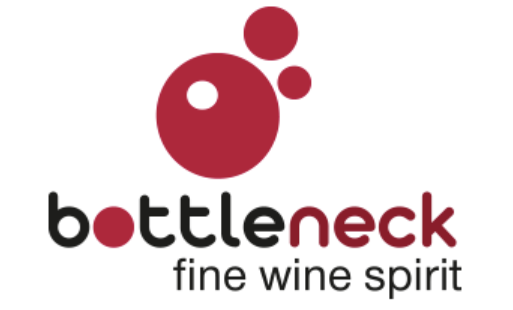

<html><font color="brown", size = "+3"><strong><u> Sommaire COPIL </u></strong></font></html>

<ul>
<li><a href = "#0">Import des librairies</a></li>
<a href = "#I">I. Exploration, nettoyage et rapprochement des fichiers</a>
    <ul>
    <li><a href = "#erp">1.1 Fichier ERP</a></li>
    <li><a href = "#web">1.2 Fichier WEB </a></li>
    <li><a href = "#liaison">1.3 Fichier LIAISON</a></li>
    <li><a href = "#fusion">1.4 Rapprochement des fichiers</a></li>
    </ul>
<li><a href = "#II">II. Chiffre d'affaire : analyses</a></li>
    <ul>
    <li><a href = "#ca par produit">2.1 Chiffre d'affaire par produit</a></li>
    <li><a href = "#ca réalisé en ligne">2.2 Chiffre d'affaire réalisé en ligne</a></li>
    </ul>
 <li><a href = "#III">III. Prix : identification des outliers</a></li>
    <ul>
    <li><a href = "#identification">3.1 Indentification</a></li>
    <li><a href = "#représentation">3.2 Représentation graphique</a></li>
    </ul>
<li><a href = "#IV">IV. Conclusion</a></li>
</ul>

<a id = "0"></a><br>
<html><font color='brown', size = "+3"><strong><u> Import des librairies </u></strong></font></html>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import matplotlib.cbook as cbk

<a id = "I"></a><br>
<html><font color='brown', size = "+3"><strong><u> I . Exploration, nettoyage et rapprochement des fichiers</u></strong></font></html>

<a id = "erp"></a><br>
<html><font color='brown', size = "+2"><strong>1.1 Fichier ERP </strong></font></html>

In [3]:
erp = pd.read_excel("erp.xls")
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Dimensions du dataframe ERP

In [4]:
erp.shape

(825, 5)

### Type de données du dataframe ERP

In [5]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

###  Conversion du type de données product_id et onsaleweb

In [6]:
#convertir id en object
erp["product_id"] = erp["product_id"].astype("object")
erp["onsale_web"] = erp["onsale_web"].astype("object")
erp.dtypes

product_id         object
onsale_web         object
price             float64
stock_quantity      int64
stock_status       object
dtype: object

###  Etude de la clé product_ID et autres variables

In [7]:
erp.describe(include = "all")
#825 id uniques sur 825 lignes

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.0,825.0,825.000000,825.000000,825
unique,825.0,2.0,NaN,NaN,2
top,4096.0,1.0,NaN,NaN,instock
freq,1.0,717.0,NaN,NaN,638
mean,NaN,NaN,32.415636,26.496970,NaN
std,NaN,NaN,26.795849,45.892422,NaN
min,NaN,NaN,5.200000,0.000000,NaN
25%,NaN,NaN,14.600000,1.000000,NaN
50%,NaN,NaN,24.400000,11.000000,NaN
75%,NaN,NaN,42.000000,34.000000,NaN


### Nombre de valeurs nulles

In [8]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    object 
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 32.4+ KB


### Nombre de doublons du dataframe ERP

In [9]:
doublons_erp = erp.duplicated()
doublons_erp.value_counts()

False    825
dtype: int64

### Etude du nombre de produits vendus en ligne d'apres le dataframe ERP

In [10]:
erp["onsale_web"].value_counts()
#717 articles vendus sur le web d'après l'ERP ==> 717 sku ?

1    717
0    108
Name: onsale_web, dtype: int64

### Etude du stock dataframe ERP

In [11]:
is_in_stock = erp["stock_quantity"]>0
is_in_stock.value_counts()

True     637
False    188
Name: stock_quantity, dtype: int64

In [12]:
erp["stock_status"].value_counts()

instock       638
outofstock    187
Name: stock_status, dtype: int64

In [13]:
# une erreur concernant le statut du stock
erp[(erp["stock_quantity"] == 0 )&(erp["stock_status"] == "instock")]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


<a id = "web"></a><br>
<html><font color='brown', size = "+2"><strong>1.2 Fichier WEB </strong></font></html>

In [14]:
web = pd.read_excel("web.xls")
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Dimensions du dataframe WEB

In [15]:
web.shape

(1513, 28)

### Type de données du dataframe WEB

In [16]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


### Etude de la clé sku et autres variables

In [17]:
web.describe(include = "all", datetime_is_numeric=True)
#714 sku uniques (vs 717 produits en ligne d'après l'ERP et 1428 sku dans le dataframe WEB)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428.0,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,716,NaN,NaN,NaN,NaN,1430,NaN,2,1,NaN
top,15360.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,lucien-boillot-pommard-1er-cru-les-croix-noire...,NaN,NaN,NaN,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,product,image/jpeg,NaN
freq,2.0,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,2018-08-22 03:22:17.090908928,...,NaN,2020-06-20 13:59:29.781818368,2020-06-20 12:06:02.509090816,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,2018-02-27 20:01:12.500000,...,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,2018-04-19 14:56:05,...,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,2019-01-31 14:35:47,...,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,NaN,2.000000,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,NaN,0.0,NaN,NaN,0.0


### Nombre de valeurs nulles

In [18]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [19]:
web.isnull().mean()

sku                      0.056180
virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
average_rating           0.054858
total_sales              0.054858
tax_status               0.526768
tax_class                1.000000
post_author              0.054858
post_date                0.054858
post_date_gmt            0.054858
post_content             1.000000
post_title               0.054858
post_excerpt             0.526768
post_status              0.054858
comment_status           0.054858
ping_status              0.054858
post_password            1.000000
post_name                0.054858
post_modified            0.054858
post_modified_gmt        0.054858
post_content_filtered    1.000000
post_parent              0.054858
guid                     0.054858
menu_order               0.054858
post_type                0.054858
post_mime_type           0.528090
comment_count            0.054858
dtype: float64

In [20]:
web[web["sku"].isnull()]
#85 rows
#sans le sku, nous ne pouvons lier les informations de ces produits à la table erp => drop les 85 lignes

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nettoyage des lignes ayant un sku nul

In [21]:
web.dropna(axis = 0, subset = ["sku"], inplace = True )

In [22]:
#vérification du nettoyage
web.shape

(1428, 28)

In [23]:
#re-indexage suite à la suppression des 85 lignes
web = pd.DataFrame(data = web).reset_index(drop = "True")

###  Conversion du type de données total_sales

In [24]:
web["total_sales"] = web["total_sales"].astype("int64")
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                       int64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


### Nombre des doublons du dataframe WEB

In [25]:
#vérification des doublons sur le df entier : pas de doublons
doublons_web = web.duplicated()
doublons_web.value_counts()

False    1428
dtype: int64

In [26]:
doublons_sku = web["sku"].duplicated()
doublons_sku.value_counts()

False    714
True     714
Name: sku, dtype: int64

In [27]:
web[doublons_sku].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
714,15298,0,0,0,0.0,6,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
715,15296,0,0,0,0.0,0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
716,15300,0,0,0,0.0,0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
717,19814,0,0,0,0.0,3,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
718,19815,0,0,0,0.0,0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [28]:
web[~doublons_sku].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [29]:
web["post_type"].value_counts()

attachment    714
product       714
Name: post_type, dtype: int64

### Nettoyage des doublons

In [30]:
#les doublons correspondent à des attachements, images du produit ==> drop 714 doublons
web.drop_duplicates(subset="sku", keep='first', inplace=True, ignore_index=False)

In [31]:
#vérification du nettoyage
web.shape

(714, 28)

In [32]:
web["post_type"].value_counts()

product    714
Name: post_type, dtype: int64

<a id = "liaison"></a><br>
<html><font color='brown', size = "+2"><strong>1.3 Fichier LIAISON </strong></font></html>

In [33]:
liaison = pd.read_excel("liaison.xls")
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Dimensions du dataframe liaison

In [34]:
liaison.shape

(825, 2)

### Type de données du dataframe liaison

In [35]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

###  Conversion du type de données total_sales

In [36]:
liaison["product_id"] = liaison["product_id"].astype(object)
liaison.dtypes

product_id    object
id_web        object
dtype: object

### Etude des clés product_id et sku

In [37]:
liaison.describe()
#même nombre de product_id que dans le fichier erp
#nombre supérieur d'id_web que de sku le fichier web (714) ==> erreurs de saisie manuelle ?
#nombre d'id ERP > nombre d'id_web et sku

,product_id,id_web
count,825,734
unique,825,734
top,4096,15360
freq,1,1


### Modification du nom de la clé id_web vers sku

In [38]:
liaison = liaison.rename(columns={"id_web":"sku"})

### Nombre de valeurs nulles


In [39]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    object
 1   sku         734 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


<a id = "fusion"></a><br>
<html><font color='brown', size = "+2"><strong>1.4 Rapprochement des fichiers </strong></font></html>

### Comparaison des clés entre dataframe

In [40]:
erp_id_list = erp["product_id"].tolist()
liaison_id_list = liaison["product_id"].tolist()

In [41]:
set(erp_id_list) - set(liaison_id_list)
#pas de différence entre les clés id_product des df ERP et liaison

set()

In [42]:
web_sku_list = web["sku"].tolist()
liaison_sku_list = liaison["sku"].tolist()

In [43]:
sku_fichier_liaison_non_retrouvés = set(liaison_sku_list) - set(web_sku_list)
sku_fichier_liaison_non_retrouvés
#erreurs de saisie manuelle dans le fichier liaison ?

{12601,
 13577,
 13771,
 14360,
 14377,
 14379,
 14648,
 '14680-1',
 14689,
 14715,
 14730,
 14785,
 15065,
 15154,
 15272,
 15529,
 15586,
 15608,
 15609,
 15630,
 nan}

### Left Join entre le DF WEB et le DF LIAISON

In [44]:
web_et_liaison = pd.merge(web, liaison, on = "sku", how = "left")

In [45]:
web_et_liaison.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id
0,bon-cadeau-25-euros,0,0,0,0.0,10,taxable,NaN,1.0,2018-06-01 13:53:46,...,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954
1,15298,0,0,0,0.0,6,taxable,NaN,2.0,2018-02-08 12:58:52,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847
2,15296,0,0,0,0.0,0,taxable,NaN,2.0,2018-02-08 13:49:41,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849
3,15300,0,0,0,0.0,0,taxable,NaN,2.0,2018-02-08 14:08:36,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850
4,19814,0,0,0,0.0,3,taxable,NaN,2.0,2018-02-09 14:01:05,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032


In [46]:
#vérification de la complétude après join
web_et_liaison["product_id"].isnull().value_counts()

False    714
Name: product_id, dtype: int64

### Left Join entre le DF web_et_liaison et le DF ERP

In [47]:
web_et_erp = pd.merge(web_et_liaison, erp, on ="product_id", how = "left")

In [48]:
web_et_erp.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0,0,0,0.0,6,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0,0,0,0.0,0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15300,0,0,0,0.0,0,taxable,NaN,2.0,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
4,19814,0,0,0,0.0,3,taxable,NaN,2.0,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock


In [49]:
#vérification de la complétude après join
web_et_erp.isnull().mean()
#aucune valeur nulle sur les colonnes sku, total_sales, produc_id, price

sku                      0.0
virtual                  0.0
downloadable             0.0
rating_count             0.0
average_rating           0.0
total_sales              0.0
tax_status               0.0
tax_class                1.0
post_author              0.0
post_date                0.0
post_date_gmt            0.0
post_content             1.0
post_title               0.0
post_excerpt             0.0
post_status              0.0
comment_status           0.0
ping_status              0.0
post_password            1.0
post_name                0.0
post_modified            0.0
post_modified_gmt        0.0
post_content_filtered    1.0
post_parent              0.0
guid                     0.0
menu_order               0.0
post_type                0.0
post_mime_type           1.0
comment_count            0.0
product_id               0.0
onsale_web               0.0
price                    0.0
stock_quantity           0.0
stock_status             0.0
dtype: float64

In [50]:
#vérification de la complétude après join
print(web_et_erp["onsale_web"].value_counts())

1    714
Name: onsale_web, dtype: int64


### Comparaison des id_product onsaleweb et id_product  après merge

In [51]:
erp["onsale_web"].value_counts()
#717 articles vendus sur le web d'après l'ERP (df erp) vs 714 sku (df web), quels produits n'ont pas été retrouvés ?

1    717
0    108
Name: onsale_web, dtype: int64

In [52]:
list_onsaleweb_product_id_erp = erp[erp["onsale_web"] == 1]["product_id"].tolist()
list_product_id_web_et_erp = web_et_erp["product_id"]

In [53]:
onsale_web_but_not_found_web = set(list_onsaleweb_product_id_erp) - set(list_product_id_web_et_erp)
print(onsale_web_but_not_found_web)

{4594, 5075, 5070}


In [54]:
liaison[liaison["product_id"].isin(onsale_web_but_not_found_web)]

,product_id,sku
242,4594,NaN
486,5070,NaN
487,5075,NaN


<a id = "II"></a><br>
<html><font color='brown', size = "+3"><strong><u> II . Chiffre d'affaire : analyses</u></strong></font></html>

<a id = "ca par produit"></a><br>
<html><font color='brown', size = "+2"><strong>2.1 Chiffre d'affaire par produit </strong></font></html>

### Projection sur les colonnes utiles à l'étude du CA par produit

In [55]:
ca_par_produit = web_et_erp.loc[:,["sku","product_id","post_name","total_sales","price"]]

### Création des colonnes ca_par_produit, sales_frequency, pourcentage_du_ca

In [56]:
ca_par_produit["ca_par_produit(€)"] = web_et_erp["total_sales"] * web_et_erp["price"]
ca_par_produit["sales_frequency(%)"] = (web_et_erp["total_sales"] /web_et_erp["total_sales"].sum())*100
ca_par_produit["pourcentage_du_ca"] = (ca_par_produit["ca_par_produit(€)"] / ca_par_produit["ca_par_produit(€)"].sum())*100 
ca_par_produit = ca_par_produit[[c for c in ca_par_produit if c not in ['price', 'ca_par_produit(€)', "pourcentage_du_ca"]] + ['price', 'ca_par_produit(€)', "pourcentage_du_ca"]]

In [57]:
ca_par_produit.head()

,sku,product_id,post_name,total_sales,sales_frequency(%),price,ca_par_produit(€),pourcentage_du_ca
0,bon-cadeau-25-euros,4954,bon-cadeau-de-25-euros,10,0.349040,25.0,250.0,0.354265
1,15298,3847,pierre-jean-villa-saint-joseph-preface-2018,6,0.209424,24.2,145.2,0.205757
2,15296,3849,pierre-jean-villa-saint-joseph-tilde-2017,0,0.000000,34.3,0.0,0.000000
3,15300,3850,pierre-jean-villa-croze-hermitage-accroche-coe...,0,0.000000,20.8,0.0,0.000000
4,19814,4032,pierre-jean-villa-igp-gamine-2018,3,0.104712,14.1,42.3,0.059942


In [58]:
fig = plt.figure()
ax = fig.add_subplot()
y =  ca_par_produit.sort_values(by="ca_par_produit(€)", ascending = True)["ca_par_produit(€)"].tolist()
ax.plot(y, "o-", color='#ad283b',  linewidth = 0.5, markersize=1)
ax.set_title("Chiffre d'affaire réalisé par produit - ordre croissant")
ax.set_xlabel("Produits")
ax.set_ylabel("CA(€)")
ax.grid(True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [59]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.hist(ca_par_produit["ca_par_produit(€)"], bins = np.arange(ca_par_produit["ca_par_produit(€)"].min(),5000,100), color = "goldenrod")
ax1.set_title("Chiffre d'affaire réalisé par produit ")
ax1.set_ylabel("Nombre de produits")
ax1.set_xlabel("CA(€)")
tick_positions = np.arange(0,5000,100)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_positions, rotation = 90)
ax1.grid(True)

ax2.hist(ca_par_produit[ca_par_produit["ca_par_produit(€)"]>0]["ca_par_produit(€)"], bins = np.arange(ca_par_produit[ca_par_produit["ca_par_produit(€)"]>0]["ca_par_produit(€)"].min(),5000,100), color = "darkred")
ax2.set_title("Chiffre d'affaire réalisé par produit (> 0 €) ")
ax2.set_ylabel("Nombre de produits")
ax2.set_xlabel("CA(€)")
tick_positions = np.arange(ca_par_produit[ca_par_produit["ca_par_produit(€)"]>0]["ca_par_produit(€)"].min(),5000,100)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_positions, rotation = 90)
ax2.grid(True)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
# 329 produits vendus en ligne n'ont généré aucun CA, soit 46% des produits
ca_par_produit[ca_par_produit["pourcentage_du_ca"] == 0].shape

(329, 8)

In [61]:
effectif_cumulé = ca_par_produit.sort_values(by="ca_par_produit(€)", ascending = False)["ca_par_produit(€)"].cumsum()

In [62]:
effectif_cumulé

195     4704.0
72      8967.0
219    11255.0
71     12845.0
70     14405.0
        ...   
395    70568.6
64     70568.6
65     70568.6
66     70568.6
713    70568.6
Name: ca_par_produit(€), Length: 714, dtype: float64

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
y = effectif_cumulé.to_list()
ax.plot(y, "o-", color='#ad283b',  linewidth = 0.5, markersize=1)
ax.set_title("Chiffre d'affaire par produit - somme cumulée")
ax.set_xlabel("Produits")
ax.set_ylabel("CA(€)")
ax.grid(True)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [64]:
#création des colonnes ca normalisé et du pourcentage du ca cumulé (pareto)
ca_par_produit_sorted =  ca_par_produit.sort_values(by="ca_par_produit(€)", ascending = False, ignore_index=True )
ca_par_produit_sorted['pareto'] = 100 *ca_par_produit_sorted["ca_par_produit(€)"].cumsum() / ca_par_produit_sorted["ca_par_produit(€)"].sum()
ca_par_produit_sorted['ca_normalise'] = (ca_par_produit_sorted["ca_par_produit(€)"] / ca_par_produit_sorted["ca_par_produit(€)"].max())*100

In [65]:
ca_par_produit_sorted

,sku,product_id,post_name,total_sales,sales_frequency(%),price,ca_par_produit(€),pourcentage_du_ca,pareto,ca_normalise
0,7818,4334,champagne-gosset-grand-blanc-de-blanc,96,3.350785,49.0,4704.0,6.665854,6.665854,100.000000
1,1662,4144,champagne-gosset-grand-rose,87,3.036649,49.0,4263.0,6.040930,12.706785,90.625000
2,3510,4402,cognac-frapin-vip-xo,13,0.453752,176.0,2288.0,3.242235,15.949020,48.639456
3,11641,4142,champagne-gosset-grand-millesime-2006,30,1.047120,53.0,1590.0,2.253127,18.202147,33.801020
4,304,4141,gosset-champagne-grande-reserve,40,1.396161,39.0,1560.0,2.210615,20.412761,33.163265
...,...,...,...,...,...,...,...,...,...,...
709,16276,4924,cave-de-castelmaure-corbieres-rouge-grande-cuv...,0,0.000000,12.8,0.0,0.000000,100.000000,0.000000
710,15382,4115,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0,0.000000,100.0,0.0,0.000000,100.000000,0.000000
711,15339,4130,zind-humbrecht-pinot-gris-roche-calcaire-2017,0,0.000000,23.0,0.0,0.000000,100.000000,0.000000
712,11668,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0,0.000000,88.4,0.0,0.000000,100.000000,0.000000


In [66]:
print("80 % du CA est généré par 18% des produits ")
print("50 % du CA est généré par 5% des produits ")

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(ca_par_produit_sorted.index, ca_par_produit_sorted["ca_normalise"], color="goldenrod", label = "CA normalisé")
ax.plot(ca_par_produit_sorted["pareto"], "o-", color='#ad283b',  linewidth = 0.5, markersize=1, label = "% du CA cumulé")
ax.set_title("Diagramme de Pareto")
ax.set_ylabel("CA normalisé")
secax = ax.secondary_yaxis("right")
secax.set_ylabel('CA cumulé (%)')
ax.grid(True)
plt.legend()
plt.show()

80 % du CA est généré par 18% des produits 
50 % du CA est généré par 5% des produits 


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<a id = "ca réalisé en ligne"></a><br>
<html><font color='brown', size = "+2"><strong>2.2 Chiffre d'affaire réalisé en ligne </strong></font></html>

In [67]:
ca_réalisé_en_ligne = ca_par_produit["ca_par_produit(€)"].sum()
print(f'Chiffre d\'affaire réalisé en ligne: {ca_réalisé_en_ligne} €')

Chiffre d'affaire réalisé en ligne: 70568.6 €


<a id = "III"></a><br>
<html><font color='brown', size = "+3"><strong><u> III . Prix : identification des outliers</u></strong></font></html>

<a id = "identification"></a> <br>
<html><font color='brown', size = "+2"><strong>3.1 Identification </strong></font></html>

### Etude de la distribution des prix sur les références vendues en ligne et sur l'ensemble des références

Références vendues en ligne

In [68]:
ca_par_produit.sort_values(by="price", ascending = False ).head()

,sku,product_id,post_name,total_sales,sales_frequency(%),price,ca_par_produit(€),pourcentage_du_ca
200,15940,4352,champagne-egly-ouriet-grand-cru-millesime-2008,5,0.174520,225.0,1125.0,1.594193
426,14581,5001,david-duband-charmes-chambertin-grand-cru-2014,0,0.000000,217.5,0.0,0.000000
587,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3,0.104712,191.3,573.9,0.813251
219,3510,4402,cognac-frapin-vip-xo,13,0.453752,176.0,2288.0,3.242235
553,15185,5767,camille-giroud-clos-de-vougeot-2016,0,0.000000,175.0,0.0,0.000000


In [69]:
ca_par_produit.sort_values(by="price", ascending = True ).head()

,sku,product_id,post_name,total_sales,sales_frequency(%),price,ca_par_produit(€),pourcentage_du_ca
645,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0,0.000000,5.2,0.0,0.000000
98,16210,4172,maurel-pays-oc-chardonnay-2019,43,1.500873,5.7,245.1,0.347322
99,16211,4173,maurel-pays-doc-chenin-colombard-2019,13,0.453752,5.7,74.1,0.105004
560,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0,0.000000,5.7,0.0,0.000000
100,16209,4174,maurel-cabardes-tradition-2017,6,0.209424,5.7,34.2,0.048463


In [70]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(ca_par_produit["price"],bins = np.linspace(ca_par_produit["price"].min(),ca_par_produit["price"].max(),20), color = "goldenrod")
ax.set_title("Distribution des prix - ventes en ligne")
ax.set_ylabel("Nombre de produits")
tick_positions = np.around(np.linspace(ca_par_produit["price"].min(),ca_par_produit["price"].max(),20))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Prix")
plt.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Ensemble des références

In [71]:
erp.sort_values(by="price", ascending = False ).head()

,product_id,onsale_web,price,stock_quantity,stock_status
208,4352,1,225.0,0,outofstock
460,5001,1,217.5,20,instock
635,5892,1,191.3,10,instock
227,4402,1,176.0,8,instock
598,5767,1,175.0,12,instock


In [72]:
erp.sort_values(by="price", ascending = True ).head()

,product_id,onsale_web,price,stock_quantity,stock_status
700,6129,1,5.2,30,instock
100,4172,1,5.7,167,instock
101,4173,1,5.7,100,instock
102,4174,1,5.7,94,instock
605,5777,1,5.7,132,instock


In [73]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(erp["price"],bins = np.linspace(erp["price"].min(),erp["price"].max(),20), color = "goldenrod")
ax.set_title("Distribution des prix - ERP")
ax.set_ylabel("Nombre de produits")
tick_positions = np.around(np.linspace(erp["price"].min(),erp["price"].max(),20))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Prix")
plt.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Moyenne, mediane, quartiles, min, max

Références vendues en ligne 

In [74]:
ca_par_produit["price"].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Ensemble des références

In [75]:
erp["price"].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

### Mesure de forme

Références vendues en ligne

In [76]:
print("skw:\n",ca_par_produit["price"].skew())
# comme le montre l'histogramme, la distribution des prix est étalée à droite, avec un skew >0

skw:
 2.5809012630033705


Ensemble des références

In [77]:
print("skw:\n",erp["price"].skew())

skw:
 2.6227973685638717


### Coefficient de variation

Références vendues en ligne

In [78]:
coefficient_variation = ca_par_produit["price"].std()/ca_par_produit["price"].mean()*100
print(f"coefficient de variation : {round(coefficient_variation,2)} %")
#grande dispersion autour de la moyenne

coefficient de variation : 85.59 %


Ensemble des références

In [79]:
coefficient_variation = erp["price"].std()/erp["price"].mean()*100
print(f"coefficient de variation : {round(coefficient_variation,2)} %")
#grande dispersion autour de la moyenne

coefficient de variation : 82.66 %


### IQR, whiskers, outliers :  méthode boxplotstats, méthode IQR, méthode Z score

#### méthode boxplotstats

Références vendues en ligne

In [80]:
boxplotstats = cbk.boxplot_stats(ca_par_produit["price"])
boxplotstats

[{'mean': 32.49313725490196,
  'iqr': 28.075000000000003,
  'cilo': 21.90043166453619,
  'cihi': 25.199568335463812,
  'whishi': 83.7,
  'whislo': 5.2,
  'fliers': array([100. ,  88.4, 225. , 126.5,  85.6, 176. , 108.5, 157. , 104. ,
         109.6, 102.3, 137. , 217.5, 105. , 105. , 112. ,  86.8,  92. ,
         124.8, 175. , 191.3,  93. , 122. , 114. , 135. , 105.6, 116.4,
         115. , 121. ,  99. , 115. , 121. ]),
  'q1': 14.1,
  'med': 23.55,
  'q3': 42.175000000000004}]

In [81]:
print(f"Nombre d'outliers détectés, méthode boxplot stats = {len(boxplotstats[0]['fliers'])}")

Nombre d'outliers détectés, méthode boxplot stats = 32


Ensemble des références

In [82]:
boxplotstats_erp = cbk.boxplot_stats(erp["price"])
boxplotstats_erp

[{'mean': 32.41563636363637,
  'iqr': 27.4,
  'cilo': 22.902305479219557,
  'cihi': 25.89769452078044,
  'whishi': 83.0,
  'whislo': 5.2,
  'fliers': array([ 86.1, 100. ,  88.4, 225. , 126.5,  85.6, 176. , 108.5, 157. ,
         104. , 109.6, 144. , 102.3, 137. , 217.5, 105. , 105. , 112. ,
          86.8,  84.7,  92. ,  83.7, 124.8, 175. , 191.3,  93. , 122. ,
         114. , 135. , 105.6, 116.4, 115. , 121. ,  99. , 115. , 121. ,
          92. ]),
  'q1': 14.6,
  'med': 24.4,
  'q3': 42.0}]

In [83]:
print(f"Nombre d'outliers détectés ERP, méthode boxplot stats = {len(boxplotstats_erp[0]['fliers'])}")

Nombre d'outliers détectés ERP, méthode boxplot stats = 37


#### méthode IQR

Références vendues en ligne

In [84]:
Q1 = ca_par_produit["price"].quantile(0.25)
Q3 = ca_par_produit["price"].quantile(0.75)
IQ = Q3-Q1


In [85]:
print(f"IQR = {IQ}")

IQR = 28.075000000000003


In [86]:
left_whisker = Q1-1.5*IQ
right_whisker = Q3+1.5*IQ

In [87]:
print(f"left_whisker =  {left_whisker}")
print(f"right_whisker = {right_whisker}")

left_whisker =  -28.012500000000003
right_whisker = 84.28750000000001


In [88]:
liste_outliers_méthode_IQR = ca_par_produit[(ca_par_produit["price"]<left_whisker) | (ca_par_produit["price"]>right_whisker)]["price"]

In [89]:
print(f"Nombre d'outliers détectés, méthode IQR = {len(liste_outliers_méthode_IQR)}")

Nombre d'outliers détectés, méthode IQR = 32


Ensemble des références

In [90]:
Q1_ERP = erp["price"].quantile(0.25)
Q3_ERP = erp["price"].quantile(0.75)
IQ_ERP = Q3_ERP-Q1_ERP


In [91]:
print(f"IQR = {IQ_ERP}")

IQR = 27.4


In [92]:
left_whisker_ERP = Q1_ERP-1.5*IQ_ERP
right_whisker_ERP = Q3_ERP+1.5*IQ_ERP

In [93]:
print(f"left_whisker =  {left_whisker_ERP}")
print(f"right_whisker = {right_whisker_ERP}")

left_whisker =  -26.499999999999993
right_whisker = 83.1


In [94]:
liste_outliers_méthode_IQR_ERP = erp[(erp["price"]<left_whisker_ERP) | (erp["price"]>right_whisker_ERP)]["price"]

In [95]:
print(f"Nombre d'outliers détectés, méthode IQR = {len(liste_outliers_méthode_IQR_ERP)}")

Nombre d'outliers détectés, méthode IQR = 37


#### méthode z-score

Références vendues en ligne

In [96]:
mean =  ca_par_produit["price"].mean()

In [97]:
std = ca_par_produit["price"].std()

In [98]:
liste_outliers_méthode_zscore = []
for price in ca_par_produit["price"] :
    if abs((price-mean)/std)>2 :
        liste_outliers_méthode_zscore.append(price)

In [99]:
print(f"Nombre d'outliers détectés, méthode IQR = {len(liste_outliers_méthode_zscore)}")

Nombre d'outliers détectés, méthode IQR = 30


Ensemble des références

In [100]:
mean_erp =  erp["price"].mean()

In [101]:
std_erp = erp["price"].std()

In [102]:
liste_outliers_méthode_zscore_ERP = []
for price in erp["price"] :
    if abs((price-mean_erp)/std_erp)>2 :
        liste_outliers_méthode_zscore_ERP.append(price)

In [103]:
print(f"Nombre d'outliers détectés, méthode IQR = {len(liste_outliers_méthode_zscore_ERP)}")

Nombre d'outliers détectés, méthode IQR = 34


### Liste des outliers

Références vendues en ligne

In [104]:
df_outliers = ca_par_produit[(ca_par_produit["price"]<boxplotstats[0]["whislo"]) | (ca_par_produit["price"]>boxplotstats[0]["whishi"])].sort_values(by = "price", ascending = False)
df_outliers

,sku,product_id,post_name,total_sales,sales_frequency(%),price,ca_par_produit(€),pourcentage_du_ca
200,15940,4352,champagne-egly-ouriet-grand-cru-millesime-2008,5,0.174520,225.0,1125.0,1.594193
426,14581,5001,david-duband-charmes-chambertin-grand-cru-2014,0,0.000000,217.5,0.0,0.000000
587,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3,0.104712,191.3,573.9,0.813251
219,3510,4402,cognac-frapin-vip-xo,13,0.453752,176.0,2288.0,3.242235
553,15185,5767,camille-giroud-clos-de-vougeot-2016,0,0.000000,175.0,0.0,0.000000
222,7819,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0,0.000000,157.0,0.0,0.000000
382,14220,4904,domaine-des-croix-corton-charlemagne-grand-cru...,5,0.174520,137.0,685.0,0.970687
642,14923,6126,champagne-gosset-celebris-vintage-2007,2,0.069808,135.0,270.0,0.382606
202,12589,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11,0.383944,126.5,1391.5,1.971840
511,14915,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,0,0.000000,124.8,0.0,0.000000


In [105]:
df_outliers.shape

(32, 8)

Ensemble des références

In [106]:
df_outliers_ERP = erp[(erp["price"]<boxplotstats_erp[0]["whislo"]) | (erp["price"]>boxplotstats_erp[0]["whishi"])].sort_values(by = "price", ascending = False)
df_outliers_ERP

,product_id,onsale_web,price,stock_quantity,stock_status
208,4352,1,225.0,0,outofstock
460,5001,1,217.5,20,instock
635,5892,1,191.3,10,instock
227,4402,1,176.0,8,instock
598,5767,1,175.0,12,instock
230,4406,1,157.0,3,instock
242,4594,1,144.0,0,outofstock
411,4904,1,137.0,13,instock
697,6126,1,135.0,10,instock
210,4355,1,126.5,2,instock


In [107]:
df_outliers_ERP.shape

(37, 5)

In [108]:
outliers_suplementaires_ERP =set(df_outliers_ERP["product_id"].tolist())-set(df_outliers["product_id"].tolist())
outliers_suplementaires_ERP

{4055, 4594, 5070, 5580, 6324}

<a id = "représentation"></a> <br>
<html><font color='brown', size = "+2"><strong>3.2 Représentation graphique</strong></font></html>

### Boxplot

In [109]:
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(ca_par_produit["price"])
ax.set_title("Dispersion des prix ventes en ligne - boxplot")
plt.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(erp["price"])
ax.set_title("Dispersion des prix ERP - boxplot")
plt.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Scatterplot

In [111]:
df_valeurs_ok = ca_par_produit[(ca_par_produit["price"]>=boxplotstats[0]["whislo"]) & (ca_par_produit["price"]<=boxplotstats[0]["whishi"])]
df_valeurs_ok.shape

(682, 8)

In [112]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df_valeurs_ok["price"].index, df_valeurs_ok["price"], color = "goldenrod")
ax.scatter(df_outliers["price"].index, df_outliers["price"],  color='#ad283b')
ax.set_title("Dispersion des prix ventes en ligne - scatter plot")
ax.set_ylabel("Prix")
ax.set_xlabel("Index")
plt.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [113]:
df_valeurs_ok_ERP = erp[(erp["price"]>=boxplotstats_erp[0]["whislo"]) & (erp["price"]<=boxplotstats_erp[0]["whishi"])]
df_valeurs_ok_ERP.shape

(788, 5)

In [114]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df_valeurs_ok_ERP["price"].index, df_valeurs_ok_ERP["price"], color = "goldenrod")
ax.scatter(df_outliers_ERP["price"].index, df_outliers_ERP["price"],  color='#ad283b')
ax.set_title("Dispersion des prix ERP - scatter plot")
ax.set_ylabel("Prix")
ax.set_xlabel("Index")
plt.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<a id = "IV"></a> <br>
<html><font color='brown', size = "+3"><strong><u> IV . Conclusion</u></strong></font></html>

### Pricipaux éléments d'analyse

<b>Best sellers : </b><br/>
<b>- 50% du CA réalisé en ligne est généré par 5 % des produits</b><br/>
<b>- 80% du CA réalisé en ligne est généré par 18 % des produits</b>

In [115]:
fig = plt.figure()
ax = fig.add_subplot()
y = effectif_cumulé.to_list()
ax.plot(y, "o-", color='#ad283b',  linewidth = 0.5, markersize=1)
ax.set_title("Chiffre d'affaire par produit - somme cumulée")
ax.set_xlabel("Produits")
ax.set_ylabel("CA(€)")
ax.grid(True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<b>- 46% des produits vendus en ligne n'ont généré aun CA sur la période considérée</b>

In [116]:
ca_par_produit[ca_par_produit["pourcentage_du_ca"] == 0].shape

(329, 8)

<b>- Aucune valeur aberrante ou erreur n'a été repérée concernant les prix </b>

### Recommandations concernant le système d'information

<b> - Etudier les références non retrouvées entre liaison /web et erp /web e teffectuer les corrections</b>

In [117]:
#id_web présents sur fichier liaison mais sku non retrouvés dans le fichier web
#corriger le fichier liaison
sku_fichier_liaison_non_retrouvés

{12601,
 13577,
 13771,
 14360,
 14377,
 14379,
 14648,
 '14680-1',
 14689,
 14715,
 14730,
 14785,
 15065,
 15154,
 15272,
 15529,
 15586,
 15608,
 15609,
 15630,
 nan}

In [118]:
#717 articles vendus sur le web d'après l'ERP (df erp) vs 714 sku (df web), quels produits n'ont pas été retrouvés ?
#corriger le statut onsale_web dans l'ERP pour ces références
onsale_web_but_not_found_web

{4594, 5070, 5075}

<b> - Corriger l'erreur de statut du stock</b>

In [119]:
# une erreur concernant le statut du stock
erp[(erp["stock_quantity"] == 0 )&(erp["stock_status"] == "instock")]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


<b> - Etudier les fonctions non utilisées sur le web : notamment rating count, average rating</b>

<b> - Etudier la possibilité de mettre en place une solution centralisée </b>

### Recommandation concernant l'offre produit

<b> - Compléter l’analyse des produits par le CA réalisée par une analyse de la rentabilité et de l'âge des produits (50% du CA réalisé en ligne est généré par 5 % des produits, 46% des produits vendus en ligne n'ont généré aun CA sur la période considérée) </b>

<a href = "#Sommaire"> Retour au sommaire </a>